# **Project 2**, APS1070 Fall 2023
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: OCT 27, 11 PM**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: 
*   Student Number: 

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



In [27]:
%%shell
jupyter nbconvert --to html /content/APS1070_Project_2.ipynb

[NbConvertApp] Converting notebook /content/APS1070_Project_2.ipynb to html
[NbConvertApp] Writing 2532159 bytes to /content/APS1070_Project_2.html


##**Part 1: Getting started [1.5 Marks]**

We are going to work with a [credit card fraud detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) dataset, consisting of transactions made by credit cards in September 2013 by European cardholders. The dataset contains only numerical input variables (`V1`, `V2`, … `V28`) which are the principal components obtained with PCA transformation (PCA will the introduced later in this course), due to confidentiality issues. The only features which have not been transformed with PCA are `Time` (seconds elapsed between each transaction and the first transaction in the dataset) and `Amount` (transaction Amount).\
This dataset contains 30 key features, which are not
directly interpretable but contain meaningful information about the dataset.
Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? 284807 **[0.1]**
* Which column contains the targets? Class column **[0.1]**
* What is the meaning of target values? 0:not fraud. 1:fraud **[0.2]**

In [1]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=8c118f32b775970599a949ce37081eac34e94b55cd3fa03d21feb66efc90d512
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import wget

wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/master/creditcard.csv')

'creditcard.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
### YOUR CODE HERE ###
df = pd.read_csv('creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? **fraud: 0.173% normal: 99.827%** **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case? **unbalanced, because the difference of the percentage of the two class is enormous** **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? **Balance is important, beacause if we train a dataset which contains the data that most are not fraud, let's say, 99 persent of it is not fraud, so when we validating the model, the accuracy will be 99 percent, which is decieving. from project 1, if we set the threshold of judging 0 or 1 is too deviated, say we have 99% 1 and 1% 0, so even if we have a model that judge every data to 1, the accuracy will still be 99%, but it still a bad model.** **\[0.5]**
* What metrics should we use to evaluate a model in such cases **F1 score, Confusion Matrix, ROC & AUC** **[0.2]**


In [28]:
### YOUR CODE HERE ###
fraud_count = df.Class.sum() / df.shape[0]
print('normal persentage: {}'.format(1 - fraud_count))
print('fraud persentage: {}'.format(fraud_count))

normal persentage: 0.9982725143693799
fraud persentage: 0.001727485630620034


Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [10]:
### Split the data  ###
y = df['Class']
X = df.drop(['Class', 'Amount', 'Time'], axis = 1) #drop these three colums
#split the data to three parts
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size = 0.5, random_state = 0)

Now, let's take a look at the difference in distribution for all variables between non-fraudulent and fraudulent credit card transactions:

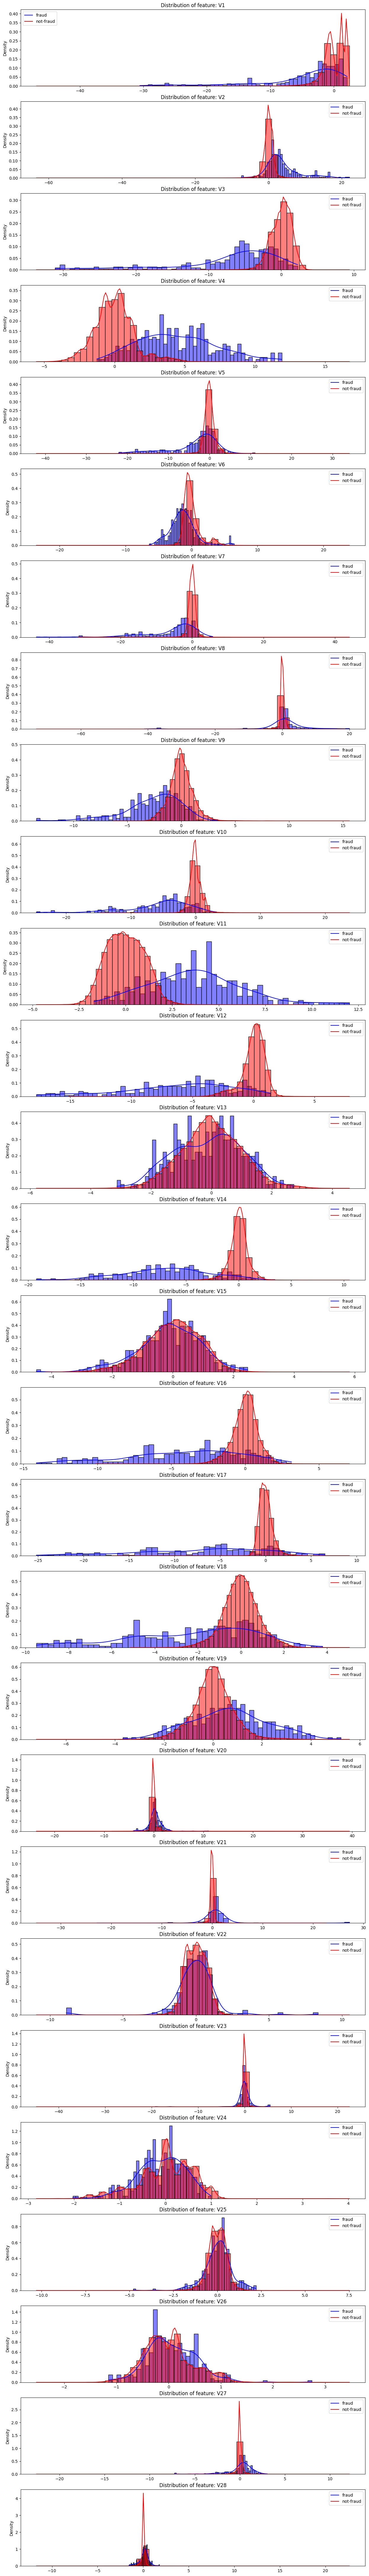

In [11]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if f not in['Class', 'Amount', 'Time']]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    # print(feat)
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraud', 'not-fraud'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

**These graphs show us the gussian distribution of fraud or normal transaction according to different features, these graphs can tell us which features is uesful in judging whether a trasaction is fraud or normal, for example: V3, V4, V10, V11, V12, V14, V16 and V17 are good features, beacause their guassian distribution's mean value is more seperate than others.**

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**.

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table.
  4. Find the best 3 features to distinguish fraud transactions from not-fraud transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. Compute AUC and F1 score when you fit a Gaussian **only on not-fraud transactions** (instead of all the transactions).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**





In [12]:
#part 2.a_1~3

### YOUR CODE HERE ###
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve, roc_auc_score

roc_train_scores = []
roc_val_scores = []

for feature_column_num in range(28):
  feature_train = X_train.iloc[:, feature_column_num].values.reshape(-1, 1)
  feature_val = X_val.iloc[:, feature_column_num].values.reshape(-1, 1)

  #use train set and validation set to complete the AUC curve
  # feature_train_val = pd.concat([feature_train, feature_val])
  # y_train_val = pd.concat([y_train, y_val])
  # feature_train_val = np.concatenate((feature_train, feature_val))
  # y_train_val = np.concatenate((y_train, y_val))

  #train the model
  gm_single_feature = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
  gm_single_feature.fit(feature_train)

  train_scores = gm_single_feature.score_samples(feature_train)
  val_scores = gm_single_feature.score_samples(feature_val)

  roc_auc_train = roc_auc_score(y_train, -train_scores)
  roc_auc_val = roc_auc_score(y_val, -val_scores)

  roc_train_scores.append(roc_auc_train)
  roc_val_scores.append(roc_auc_val)

  # print(roc_auc_train)
  # print(roc_auc_val)

# print(roc_train_scores)
# print(roc_val_scores)

#show AUC in tabel
roc_table = pd.DataFrame({'train_auc' : roc_train_scores, 'val_auc': roc_val_scores}, index = df.columns[1:29])
print(roc_table)

     train_auc   val_auc
V1    0.705102  0.694811
V2    0.837499  0.837800
V3    0.876537  0.838364
V4    0.892103  0.888283
V5    0.771825  0.786857
V6    0.734380  0.673559
V7    0.862967  0.867423
V8    0.773238  0.774130
V9    0.802874  0.776739
V10   0.913600  0.905959
V11   0.897175  0.882058
V12   0.920180  0.837909
V13   0.572152  0.561798
V14   0.952459  0.938073
V15   0.514764  0.509647
V16   0.902137  0.882852
V17   0.934852  0.881858
V18   0.808030  0.785790
V19   0.741874  0.770560
V20   0.734692  0.686071
V21   0.833521  0.764318
V22   0.561287  0.493503
V23   0.696326  0.660997
V24   0.469229  0.497913
V25   0.574918  0.521330
V26   0.503272  0.516492
V27   0.835479  0.766315
V28   0.814201  0.794233


In [13]:
#part 2.a_4
def search_for_three_max_three_feature(roc_val_scores):
  indexes = []
  index_value_pairs = list(enumerate(roc_val_scores))
  index_value_pairs.sort(key=lambda x: x[1], reverse=True)

  for i in range(3):
      indexes.append(index_value_pairs[i][0] + 1)

  return indexes

# arr = [3,4,1,2,7]
# print(search_for_three_max_three_feature(arr))
max_three_index = search_for_three_max_three_feature(roc_val_scores)
print('best three features are: ', max_three_index)

best three features are:  [14, 10, 4]


In [14]:
#part 2.a_5
from sklearn.metrics import f1_score

def find_best_threshold_f1(scores, y_val):
  f1_scores = []
  thresholds = np.linspace(min(scores), max(scores), 400)
  # print(thresholds)

  for threshold in thresholds:
    y_val_predict = []
    for score in scores:
      if score < threshold:
        y_val_predict.append(1)
      else:
        y_val_predict.append(0)
    f1 = f1_score(y_val, y_val_predict)
    f1_scores.append(f1)

  max_f1 = np.argmax(f1_scores)
  return  f1_scores[max_f1], thresholds[max_f1]


all_val_f1 = []
max_three_index.sort()
# print(max_three_index)
for n in max_three_index:
  gm_single_feature = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
  # print(X_val.iloc[:, n - 1].keys())

  feature_train = X_train.iloc[:, n - 1].values.reshape(-1, 1)
  feature_val = X_val.iloc[:, n - 1].values.reshape(-1, 1)

  gm_single_feature.fit(feature_train)
  val_scores = gm_single_feature.score_samples(feature_val)

  best_f1, best_threshold = find_best_threshold_f1(val_scores, y_val)
  all_val_f1.append(best_f1)
  print('V', n, ': best f1: ',best_f1, " best threshold:", best_threshold)

V 4 : best f1:  0.3619047619047619  best threshold: -11.040070084009209
V 10 : best f1:  0.2558139534883721  best threshold: -58.3989883154058
V 14 : best f1:  0.5901639344262295  best threshold: -19.596759674426295


6.**If we say threshold has t steps(which is 400 here), and have f features(which is 28 here), the complexity is O(tfn)**

In [15]:
#2b
#use the data only contains class 0
df_only_0 = df[df['Class'] == 0]
y_only_0 = df_only_0['Class']
X_only_0 = df_only_0.drop(['Class', 'Amount', 'Time'], axis = 1) #drop these three colums

X_train_without_fraud, X_tmp_without_fraud, y_train_without_fraud, y_tmp_without_fraud = train_test_split(X_only_0, y_only_0, test_size = 0.3, random_state = 0)

max_three_index.sort()
f1_without_fraud = []
roc_without_fraud = []
for n in max_three_index:
  gm_single_feature = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)

  feature_train_without_fraud = X_train_without_fraud.iloc[:, n - 1].values.reshape(-1, 1)
  feature_val_without_fraud = X_val.iloc[:, n - 1].values.reshape(-1, 1)

  gm_single_feature.fit(feature_train_without_fraud)
  val_scores_without_fraud = gm_single_feature.score_samples(feature_val_without_fraud)

  best_f1_without_fraud, best_threshold_without_fraud = find_best_threshold_f1(val_scores_without_fraud, y_val)
  roc_auc_val_without_fraud = roc_auc_score(y_val, -val_scores_without_fraud)

  f1_without_fraud.append(best_f1_without_fraud)
  roc_without_fraud.append(roc_auc_val_without_fraud)

In [26]:
roc_normal_val_scores = []
for i in max_three_index:
  # print(i, ' ', roc_val_scores[i])
  roc_normal_val_scores.append(roc_val_scores[i - 1])
roc_table_compare = pd.DataFrame({'all_val_auc': roc_normal_val_scores, 'without_fraud_val_auc': roc_without_fraud, 'all_val_f1': all_val_f1, 'f1_without_fraud': f1_without_fraud})
print(roc_table_compare)

   all_val_auc  without_fraud_val_auc  all_val_f1  f1_without_fraud
0     0.888283               0.888808    0.361905          0.358491
1     0.905959               0.905903    0.255814          0.255814
2     0.938073               0.938076    0.590164          0.590164


**these results are similar, because the training data is extremly unbalanced, which the fraud percentage is only 0.173%, so when training with the data that contains fraud, it will still deviate to the unfraud data, so if we remove the fraud data, the result will still be similar to the result in 2a.**

## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2).
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis).
 3. Color the data points based on their class (not-fraud blue and fraud red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points.
 6. Compute AUC on both training and validation sets
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





In [16]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt

def plt_scatter_two_features(feature_1, feature_2, y_label):
  plt.figure(figsize=(8, 6))
  plt.xlabel(feature_1)
  plt.ylabel(feature_2)
  plt.scatter(X_train[feature_1], X_train[feature_2], marker='x', c = y_label, cmap = plt.cm.bwr, s = 50)
  plt.show()

def fit_guassian_model(features, components_count):
  GMM = GaussianMixture(n_components = components_count, covariance_type= 'full', random_state=0)
  GMM.fit(X_train[features].values)
  return GMM

def calculate_train_AUC(GMM, features):
  score = GMM.score_samples(X_train[features].values)
  return roc_auc_score(y_train, -score)

def calculate_val_AUC_and_f1_threshold(GMM, features):
  score = GMM.score_samples(X_val[features].values)
  best_f1, best_threshold = find_best_threshold_f1(score, y_val)
  return roc_auc_score(y_val, -score), best_f1, best_threshold

# def estimateGaussian(X):
#     m = X.shape[0]
#     #compute mean of X
#     sum_ = np.sum(X,axis=0)
#     mu = 1/m * sum_
#     # compute variance of X
#     var = 1/m * np.sum((X - mu)**2,axis=0)
#     return mu,var

# def multivariateGaussian(X, mu, sigma2):
#     k = len(mu)
#     sigma2=np.diag(sigma2)
#     X = X - mu.T
#     #pinv will calculate Moore-Penrose pseudo-inverse of A
#     p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma2) * X,axis=1))
#     return p


def plot_circle(feature_1, feature_2, threshold, GMM):
  # mu, sigma2 = estimateGaussian(X_train[[feature_1, feature_2]].values)
  # p = multivariateGaussian(X_train[[feature_1, feature_2]].values, mu, sigma2)
  # print(p)
  plt.figure(figsize=(8,6))
  plt.xlabel(feature_1)
  plt.ylabel(feature_2)
  plt.scatter(X_train[[feature_1]], X_train[[feature_2]], marker="x", c='blue', label = 'Data Points')

  score = GMM.score_samples(X_train[[feature_1, feature_2]].values)
  is_outlier = score < threshold
  plt.scatter(X_train.loc[is_outlier, feature_1], X_train.loc[is_outlier, feature_2], marker="x", c='red', label = 'Outliers')
  plt.colorbar()

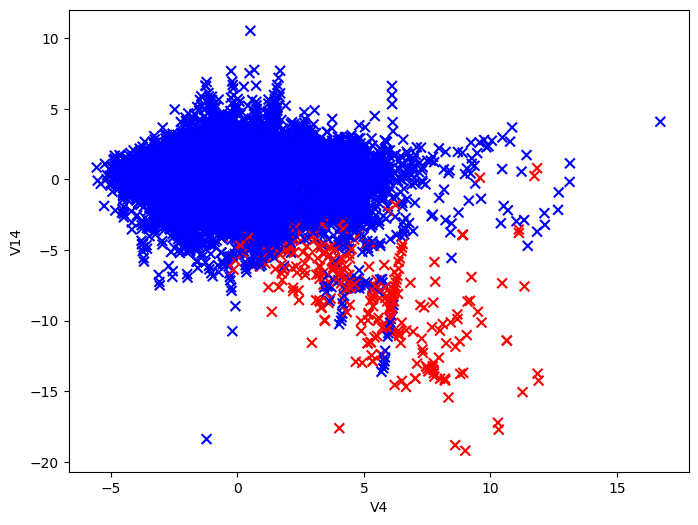

training AUC:  0.9687812197087584  validation AUC:  0.9455325706535546
best f1.    :  0.5483870967741935  best threshold:  -13.644297207515777


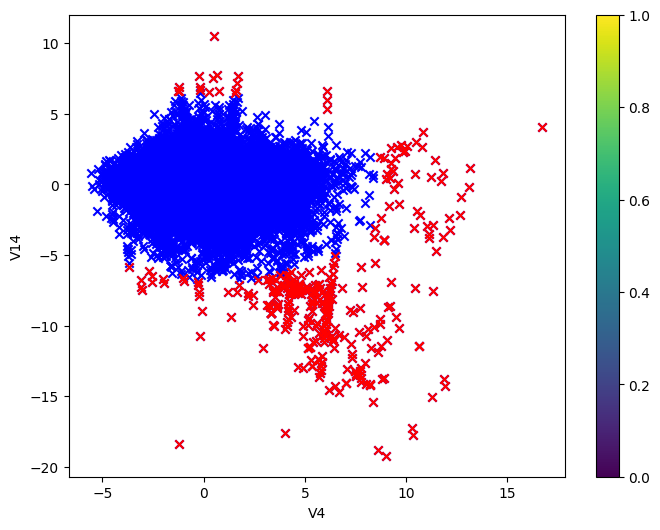

In [17]:
#draw V14 & V4 first
plt_scatter_two_features('V4', 'V14', y_train)
GMM = fit_guassian_model(['V4', 'V14'], 2)
auc_training = calculate_train_AUC(GMM, ['V4', 'V14'])
auc_val, best_f1, best_threshold = calculate_val_AUC_and_f1_threshold(GMM, ['V4', 'V14'])
print('training AUC: ', auc_training, ' validation AUC: ', auc_val)
print('best f1.    : ', best_f1,      ' best threshold: ', best_threshold)
plot_circle('V4', 'V14', best_threshold, GMM)

**We can see that there has two clusters of non-fraud data, one of it is horizontal, and the other one is vertical, so we set the n_component to 2.**

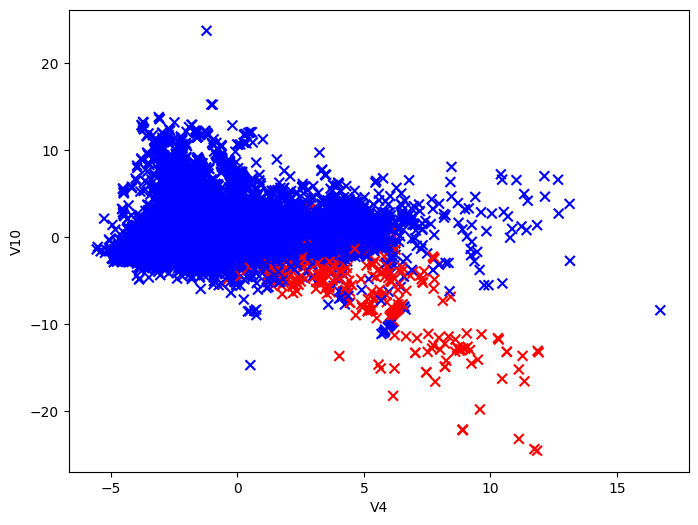

training AUC:  0.9487560542431641  validation AUC:  0.9468776528106408
best f1:     0.3  best threshold:  -51.08828503024207


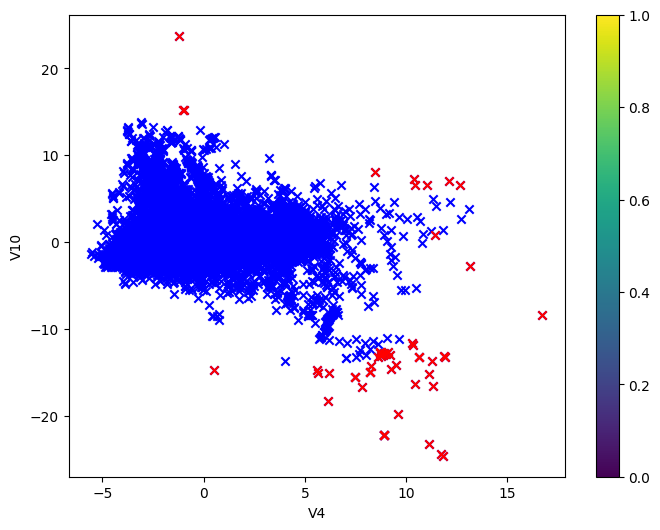

In [18]:
#draw V10 & V4 first
plt_scatter_two_features('V4', 'V10', y_train)
GMM = fit_guassian_model(['V4', 'V10'], 2)
auc_training = calculate_train_AUC(GMM, ['V4', 'V10'])
auc_val, best_f1, best_threshold = calculate_val_AUC_and_f1_threshold(GMM, ['V4', 'V10'])
print('training AUC: ', auc_training, ' validation AUC: ', auc_val)
print('best f1:    ', best_f1,        ' best threshold: ', best_threshold)
plot_circle('V4', 'V10', best_threshold, GMM)

**We can see that there has two clusters of non-fraud data on the left of the graph, so we set the n_component to 2.**

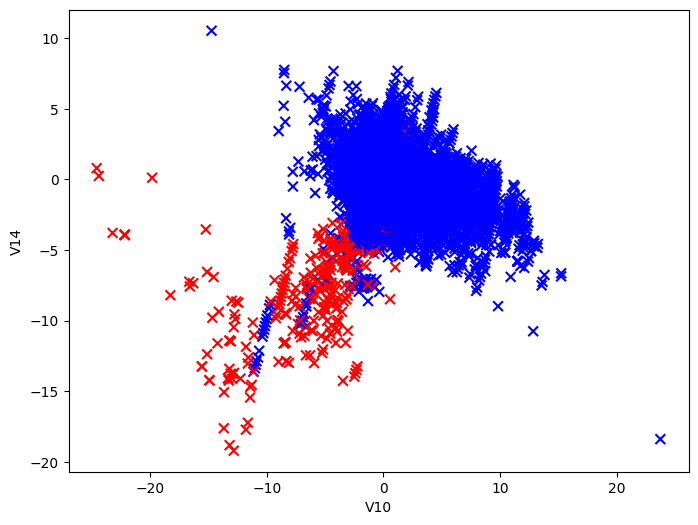

training AUC:  0.9538028522657257  validation AUC:  0.9514752164063631
best f1:       0.38571428571428573  best threshold:  -42.17328924761998


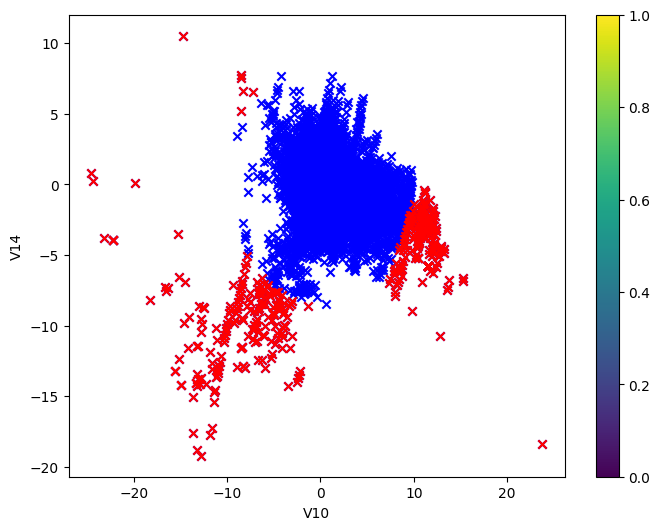

In [19]:
#draw V14 & V10 first
plt_scatter_two_features('V10', 'V14', y_train)
GMM = fit_guassian_model(['V10', 'V14'], 1)
auc_training = calculate_train_AUC(GMM, ['V10', 'V14'])
auc_val, best_f1, best_threshold = calculate_val_AUC_and_f1_threshold(GMM, ['V10', 'V14'])
print('training AUC: ', auc_training, ' validation AUC: ', auc_val)
print('best f1:      ', best_f1,      ' best threshold: ', best_threshold)
plot_circle('V10', 'V14', best_threshold, GMM)

**we can see that there has one cluster of non-fraud data on the right up side of the graph, so we set the n_component to 1.**

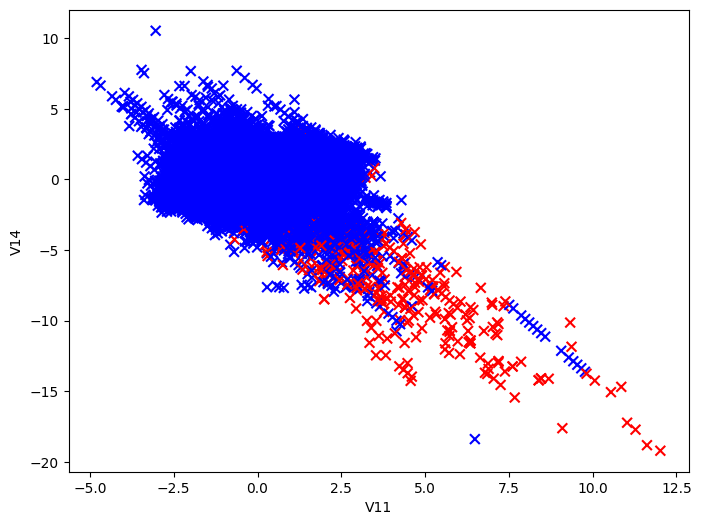

training AUC:  0.9557340494254754  validation AUC:  0.9316845929306905
best f1:       0.5794392523364486  best threshold:  -32.24812548791914


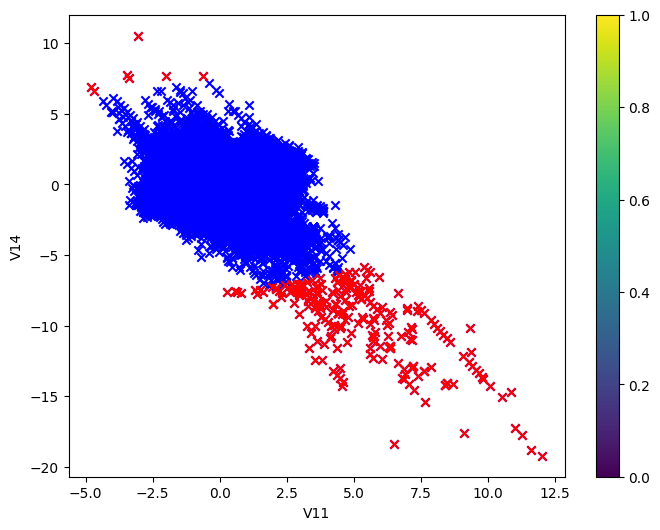

In [20]:
#draw V14 & V11 first
plt_scatter_two_features('V11', 'V14', y_train)
GMM = fit_guassian_model(['V11', 'V14'], 1)
auc_training = calculate_train_AUC(GMM, ['V11', 'V14'])
auc_val, best_f1, best_threshold = calculate_val_AUC_and_f1_threshold(GMM, ['V11', 'V14'])
print('training AUC: ', auc_training, ' validation AUC: ', auc_val)
print('best f1:      ', best_f1,      ' best threshold: ', best_threshold)
plot_circle('V11', 'V14', best_threshold, GMM)

**we can see that there has one cluster of non-fraud data on the left up side of the graph, so we set the n_component to 1.**

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for fraud and not-fraud transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **not-fraud transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraud transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as an anomaly. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is an anomaly (the transaction belongs to the $G_2$ distribution which represents fraud transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

In [21]:
### YOUR CODE HERE ###
def find_best_c_F1(S1, S2, y_val):
  best_c = -1
  best_F1 = 0

  for c in np.arange(0, 10, 0.1):
    f1 = f1_score(y_val, S1 < c*S2)
    if f1 > best_F1:
      best_F1 = f1
      best_c = c

  return best_c, best_F1

#find training f1
def find_best_c_F1_training(S1, S2, y_val, c):
  f1 = f1_score(y_val, S1 < c*S2)
  return f1


y_train_tmp = pd.DataFrame(y_train)
X_train_normal = X_train[y_train_tmp['Class'] == 0]
y_train_normal = y_train[y_train_tmp['Class'] == 0]

X_train_fraud = X_train[y_train_tmp['Class'] == 1]
y_train_fraud = y_train[y_train_tmp['Class'] == 1]

best_cs_val = []
best_F1s_val = []
f1_max_val = -1
c_max_val = -1
feature_max_val = -1

best_F1s_train = []
f1_max_train = -1
c_max_train = -1
feature_max_train = -1

for n in range(28):
  G1 = GaussianMixture(n_components = 1, covariance_type= 'full', random_state=0)
  G2 = GaussianMixture(n_components = 1, covariance_type= 'full', random_state=0)

  #fit the data to the model
  G1.fit(X_train_normal.iloc[:, n].values.reshape(-1, 1))
  G2.fit(X_train_fraud.iloc[:, n].values.reshape(-1, 1))

  S1_val = G1.score_samples(X_val.iloc[:, n].values.reshape(-1, 1))
  S2_val = G2.score_samples(X_val.iloc[:, n].values.reshape(-1, 1))
  # print(S1)
  # print(S2)
  #training set
  S1_train = G1.score_samples(X_train.iloc[:, n].values.reshape(-1, 1))
  S2_train = G2.score_samples(X_train.iloc[:, n].values.reshape(-1, 1))

  best_c_val, best_F1_val = find_best_c_F1(S1_val, S2_val, y_val)
  best_cs_val.append(best_c_val)
  best_F1s_val.append(best_F1_val)

  best_F1_train = find_best_c_F1_training(S1_train, S2_train, y_train, best_c_val)
  best_F1s_train.append(best_F1_train)

  if best_F1_val > f1_max_val:
    f1_max_val = best_F1_val
    c_max_val = best_c_val
    feature_max_val = n+1


  if best_F1_train > f1_max_train:
    f1_max_train = best_F1_train
    feature_max_train = n+1

best_c_f1_val_df = pd.DataFrame({'c': best_cs_val, 'f1_val': best_F1s_val, 'f1_train': best_F1s_train}, index=df.columns[1:29])
print(best_c_f1_val_df)
print('best F1 score for validation set is ', f1_max_val, ' of feature V', feature_max_val, ' with c ', c_max_val)
print('best F1 score for training set is ', f1_max_train, ' of feature V', feature_max_train)

       c    f1_val  f1_train
V1   5.0  0.097087  0.122651
V2   3.7  0.111111  0.127617
V3   9.9  0.273684  0.268537
V4   4.5  0.363636  0.348837
V5   5.0  0.146067  0.162544
V6   1.9  0.106870  0.092308
V7   7.8  0.207792  0.228869
V8   4.9  0.038710  0.072386
V9   3.3  0.365591  0.427984
V10  8.6  0.340909  0.414079
V11  3.8  0.517241  0.603589
V12  4.8  0.611111  0.683087
V13  1.1  0.005936  0.005001
V14  9.3  0.637168  0.634823
V15  1.2  0.006079  0.005728
V16  4.6  0.568807  0.532695
V17  7.2  0.654545  0.642173
V18  4.4  0.383838  0.435101
V19  3.3  0.058252  0.060362
V20  3.2  0.010101  0.007707
V21  1.6  0.038610  0.035819
V22  2.2  0.007299  0.033846
V23  5.2  0.030151  0.025237
V24  1.7  0.005537  0.004350
V25  1.7  0.017544  0.019562
V26  0.0  0.003132  0.003455
V27  2.7  0.041667  0.055410
V28  1.9  0.027466  0.029875
best F1 score for validation set is  0.6545454545454547  of feature V 17  with c  7.2
best F1 score for training set is  0.6830870279146141  of feature V 12


5. **best F1 score for validation set is 0.6545454545454547 of feature V17 with c 7.2,
best F1 score for training set is  0.6830870279146141  of feature V12 when using the threshold 4.8 that get from validation data set.**

## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on not-fraud transactions or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the valid transaction, and multiple components for fraud ones! Why does it make sense to have multiple components for fraud transactions?

In [22]:
### YOUR CODE HERE ###
# aim to find AUC for training and validating data, and best F1 score on both sets.

def find_best_threshold_f1_fraud(scores, y_val):
  f1_scores = []
  thresholds = np.linspace(min(scores), max(scores), 400)
  # print(thresholds)

  for threshold in thresholds:
    y_val_predict = []
    for score in scores:
      if score > threshold:
        y_val_predict.append(1)
      else:
        y_val_predict.append(0)
    f1 = f1_score(y_val, y_val_predict)
    f1_scores.append(f1)

  max_f1 = np.argmax(f1_scores)
  return  f1_scores[max_f1], thresholds[max_f1]

def find_f1_training(scores, threshold, y_train):
  y_train_predict = []
  for score in scores:
    if score < threshold:
      y_train_predict.append(1)
    else:
      y_train_predict.append(0)
  f1 = f1_score(y_train, y_train_predict)
  return  f1
def find_f1_training_fraud(scores, threshold, y_val):
  y_val_predict = []
  for score in scores:
    if score > threshold:
      y_val_predict.append(1)
    else:
      y_val_predict.append(0)
  f1 = f1_score(y_val, y_val_predict)
  return f1


#only_fraud:  0:use both data to train  1:only use fraud  2:only use normal
def model_fit(features, two_gaussian_model, components_count, only_fraud):
  #two-gaussian distribution, equal to part 4
  #determin it's multiple features or single feature
  is_single_feature = (len(features) == 1)
  if only_fraud == 0:
    X_train_part5 = X_train
  elif only_fraud == 1:
    X_train_part5 = X_train_fraud
  else:
    X_train_part5 = X_train_normal
  train_F1_score = -1
  val_F1_score = -1
  train_AUC = -1
  val_AUC = -1

  if two_gaussian_model:
    if is_single_feature:
      # print('test')
      G1 = GaussianMixture(n_components = components_count, covariance_type= 'full', random_state=0)
      G2 = GaussianMixture(n_components = components_count, covariance_type= 'full', random_state=0)

      G1.fit(X_train_normal.loc[:, features[0]].values.reshape(-1, 1))
      G2.fit(X_train_fraud.loc[:, features[0]].values.reshape(-1, 1))

      S1_train = G1.score_samples(X_train.loc[:, features[0]].values.reshape(-1, 1))
      S2_train = G2.score_samples(X_train.loc[:, features[0]].values.reshape(-1, 1))

      S1_val = G1.score_samples(X_val.loc[:, features[0]].values.reshape(-1, 1))
      S2_val = G2.score_samples(X_val.loc[:, features[0]].values.reshape(-1, 1))

      best_c, val_F1_score = find_best_c_F1(S1_val, S2_val, y_val)
      train_F1_score = find_best_c_F1_training(S1_train, S2_train, y_train, best_c)

    else:
      G1 = GaussianMixture(n_components = components_count, covariance_type= 'full', random_state=0)
      G2 = GaussianMixture(n_components = components_count, covariance_type= 'full', random_state=0)

      G1.fit(X_train_normal.loc[:, features].values)
      G2.fit(X_train_fraud.loc[:, features].values)

      S1_train = G1.score_samples(X_train.loc[:, features].values)
      S2_train = G2.score_samples(X_train.loc[:, features].values)

      S1_val = G1.score_samples(X_val.loc[:, features].values)
      S2_val = G2.score_samples(X_val.loc[:, features].values)

      best_c, val_F1_score = find_best_c_F1(S1_val, S2_val, y_val)
      train_F1_score = find_best_c_F1_training(S1_train, S2_train, y_train, best_c)
      # print('test')


  #single Gaussian distribution
  else:
    if is_single_feature:
      # print('test')
      #get the model
      GMM = GaussianMixture(n_components = components_count, covariance_type = 'full', random_state = 0)
      GMM.fit(X_train_part5.loc[:, features[0]].values.reshape(-1, 1))
      #get the two data set: training data and validation data
      train_scores = GMM.score_samples(X_train.loc[:, features[0]].values.reshape(-1, 1))
      val_scores = GMM.score_samples(X_val.loc[:, features[0]].values.reshape(-1, 1))
      #calculate each F1 score
      if only_fraud == 1:
        val_F1_score, threshold = find_best_threshold_f1_fraud(val_scores, y_val)
        train_F1_score = find_f1_training_fraud(train_scores, threshold, y_train)
      else:
        val_F1_score, threshold = find_best_threshold_f1(val_scores, y_val)
        train_F1_score = find_f1_training(train_scores, threshold, y_train)
      #calculate each AUC
      train_AUC = roc_auc_score(y_train, -train_scores)
      val_AUC = roc_auc_score(y_val, -val_scores)
    else:
      # print('test')
      GMM = GaussianMixture(n_components = components_count, covariance_type = 'full', random_state = 0)
      GMM.fit(X_train_part5[features].values)
      train_scores = GMM.score_samples(X_train[features].values)
      #calculate the four outputs
      train_F1_score = roc_auc_score(y_train, -train_scores)
      val_AUC, val_F1_score, dont_care_variable = calculate_val_AUC_and_f1_threshold(GMM, features)
      train_AUC = calculate_train_AUC(GMM, features)


  #return two AUC, two F1 score
  return train_F1_score, val_F1_score, train_AUC, val_AUC

# train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V17'], True, 1, 0)
# train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V4'], False, 1, 2)
# train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V1', 'V4'], True, 1)
# train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V1'], True, 1)
# train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V4'], False, 1)
# train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V4', 'V14', 'V15'], False, 2)
# print(train_F1_score, ' ',val_F1_score, ' ',train_AUC,' ', val_AUC)

In [23]:
#Models
# from part 1 plot:  V3, V4, V10, V11, V12, V14, V16 and V17 are good features.
# You might want to try a two-gaussian model, multiple features, a single component for the valid transaction, and multiple components for fraud ones!
train_F1_scores = []
val_F1_scores = []
train_AUCs = []
val_AUCs = []

#only_fraud:  0:use both data to train  1:only use fraud  2:only use normal
#model_fit(features, two_gaussian_model, components_count, only_fraud)

def append_to_all(train_F1_score, val_F1_score, train_AUC, val_AUC):
  train_F1_scores.append(train_F1_score)
  val_F1_scores.append(val_F1_score)
  train_AUCs.append(train_AUC)
  val_AUCs.append(val_AUC)

#0. two-gaussian model with one feature V17
train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V17'], True, 1, 0)
append_to_all(train_F1_score, val_F1_score, train_AUC, val_AUC)

#1. two-gaussian model with two feature V12, V17
train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V12', 'V17'], True, 1, 0)
append_to_all(train_F1_score, val_F1_score, train_AUC, val_AUC)

#2. two-gaussian model with three features V12, V14, V17
train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V12', 'V14', 'V17'], True, 1, 0)
append_to_all(train_F1_score, val_F1_score, train_AUC, val_AUC)

#3. two-gaussian model with four features V11, V12, V14, V17
train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V11', 'V12', 'V14', 'V17'], True, 1, 0)
append_to_all(train_F1_score, val_F1_score, train_AUC, val_AUC)

#4. one component for V14
train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V14'], False, 1, 0)
append_to_all(train_F1_score, val_F1_score, train_AUC, val_AUC)

#5. two components for V14
train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V14'], False, 2, 0)
append_to_all(train_F1_score, val_F1_score, train_AUC, val_AUC)

#6. one component for V14 only on valid transaction
train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V14'], False, 1, 2)
append_to_all(train_F1_score, val_F1_score, train_AUC, val_AUC)

#7. two component for V14 only on valid transaction
train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V14'], False, 2, 2)
append_to_all(train_F1_score, val_F1_score, train_AUC, val_AUC)

#8. one component for V14 only on fraud transaction
train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V14'], False, 1, 1)
append_to_all(train_F1_score, val_F1_score, train_AUC, val_AUC)

#9. two components for V14 on fraud transaction
train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V14'], False, 2, 1)
append_to_all(train_F1_score, val_F1_score, train_AUC, val_AUC)

#10. one component for V4, V10, V14
train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V4', 'V10', 'V14'], False, 1, 0)
append_to_all(train_F1_score, val_F1_score, train_AUC, val_AUC)

#11. two components for V4, V10, V14
train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V4', 'V10', 'V14'], False, 2, 0)
append_to_all(train_F1_score, val_F1_score, train_AUC, val_AUC)

#12. three components for V4, V10, V14
train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V4', 'V10', 'V14'], False, 3, 0)
append_to_all(train_F1_score, val_F1_score, train_AUC, val_AUC)

#13. four components for V4, V10, V14
train_F1_score, val_F1_score, train_AUC, val_AUC = model_fit(['V4', 'V10', 'V14'], False, 4, 0)
append_to_all(train_F1_score, val_F1_score, train_AUC, val_AUC)

final_training_model = pd.DataFrame({'train F1 score' : train_F1_scores, 'val F1 score': val_F1_scores, 'train AUC': train_AUCs, 'val AUC': val_AUCs})
print(final_training_model)

    train F1 score  val F1 score  train AUC   val AUC
0         0.642173      0.654545  -1.000000 -1.000000
1         0.686357      0.688525  -1.000000 -1.000000
2         0.748318      0.744186  -1.000000 -1.000000
3         0.764045      0.741935  -1.000000 -1.000000
4         0.609865      0.590164   0.952459  0.938073
5         0.599119      0.566929   0.952793  0.937013
6         0.611028      0.590164   0.952599  0.938072
7         0.600583      0.571429   0.952916  0.936981
8         0.450402      0.434109   0.104865  0.204141
9         0.335423      0.355932   0.099463  0.194053
10        0.963268      0.409091   0.963268  0.948397
11        0.960194      0.371795   0.960194  0.953146
12        0.963562      0.391892   0.963562  0.958522
13        0.960702      0.419048   0.960702  0.959383


In [24]:
final_training_model.sort_values(by = ['val F1 score', 'val AUC', 'val F1 score', 'train AUC'], ascending = False)

,train F1 score,val F1 score,train AUC,val AUC
2,0.748318,0.744186,-1.000000,-1.000000
3,0.764045,0.741935,-1.000000,-1.000000
1,0.686357,0.688525,-1.000000,-1.000000
0,0.642173,0.654545,-1.000000,-1.000000
4,0.609865,0.590164,0.952459,0.938073
6,0.611028,0.590164,0.952599,0.938072
7,0.600583,0.571429,0.952916,0.936981
5,0.599119,0.566929,0.952793,0.937013
8,0.450402,0.434109,0.104865,0.204141
13,0.960702,0.419048,0.960702,0.959383


**Since the model is aim to detect fraud transaction so we focus more on the F1 score. So we can see from the table that the best model is number 3, which is two-gaussian model with three features V12, V14, V17, and with one component.**


**From the table we can see two-gaussian model perform best on three features rather than one feature or two features or four features. For V14, one component performs better than two components on one-gaussian model, and it performs a litter bit better on full training data set than barely on valid data set. And the model performs poorly on fraud data set. For mutiple features, one component performs better on multiple features, while three components performs better on two components.**

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


model 2 works best, we can see from the table that the best model is number 3, which is two-gaussian model with three features V12, V14, V17, and with one component.

In [25]:
### YOUR CODE HERE ###
#best model is model 2

from sklearn.metrics import precision_score, recall_score

features = ['V12', 'V14', 'V17']
G1 = GaussianMixture(n_components = 1, covariance_type= 'full', random_state=0)
G2 = GaussianMixture(n_components = 1, covariance_type= 'full', random_state=0)

G1.fit(X_train_normal.loc[:, features].values)
G2.fit(X_train_fraud.loc[:, features].values)

S1_val = G1.score_samples(X_val.loc[:, features].values)
S2_val = G2.score_samples(X_val.loc[:, features].values)

best_c, val_F1_score = find_best_c_F1(S1_val, S2_val, y_val)

S1_test = G1.score_samples(X_test.loc[:, features].values)
S2_test = G2.score_samples(X_test.loc[:, features].values)
f1 = f1_score(y_test, S1_test < best_c*S2_test)
precision = precision_score(y_test, S1_test < best_c*S2_test)
recall = recall_score(y_test, S1_test < best_c*S2_test)

print('f1: ', f1, ' precision: ', precision, ' recall: ', recall)

f1:  0.768361581920904  precision:  0.7010309278350515  recall:  0.85


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references.




Gaussian is not the only useful distribution, there has a lot of other distributions.

**1. Bernoulli distribution**

Bernoully distribution is also called Binomial Distribution, which contains only two possible outcome: 0 and 1. if the possibility of 0 is p, the the possibility of 1 si 1-p.

it can apply to the situation that only has two outcomes, such as flip a coin.

**2. Poisson Distribution**

Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time.
And it's indepent between each event.

It can apply to when in a interval of time, calculating the possibility that independent event happens, such as in a particular time interval in a day, the number of cars come across a road, or calculate how many customers come to a store at a particular time interval of the day.

**3. Exponential Distribution**

it's continuous distribution, which used to discribe the time interval between different events, and the time interval is independent between each other.

so it can use to analyse the estimate broken time of a component of a machine, or use to estimate the time that the customer need to wait in line until get the service.

**4. Gamma Distribution**

it discribes the time needed when α'th event happend, we can say exponential distribution is a special distribution of gamma distribution.

So just same as exponential distrbution, gamma distribution can use to predict when we should replace a component of a machine, or predict the time needed to wait in a line until get service.


[1]https://en.wikipedia.org/wiki/Poisson_distribution

[2]https://byjus.com/maths/exponential-distribution/#:~:text=In%20Probability%20theory%20and%20statistics,at%20a%20constant%20average%20rate.

[3]https://www.cnblogs.com/think-and-do/p/6593065.html